# ASSIGNMENT: DECISION TREE COMPANY 

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
#load the libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,r2_score
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
import seaborn as sns
from sklearn.tree import plot_tree
import pandas_profiling as pp
import sweetviz as sv

In [2]:
#load Dataset
company = pd.read_csv("Company_Data.csv")

In [3]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

Check the various attributes of data like shape(rows and cols),columns,datatypes

In [4]:
# data structure number of rows and columns
company.shape

(400, 11)

In [5]:
# data types
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
# data type and null value
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


The data information to know how many missing values available in the dataset.
There are 10 total columns and 400 rows are there, Also there are 3 type of datatypes available int64, float64 and object.
Insort, 1 feature are float64, 7 feature are int64 and 3 feature are object type of data 
The second column is represents the number of not-null type of data. It means there are no any missing values in the dataset.

In [7]:
# Checking basic informations from the dataset
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


We can clearly seen that what are the min, median, std, max and 25%, 50%, 75% values.

# Checking the distribution of the target variable

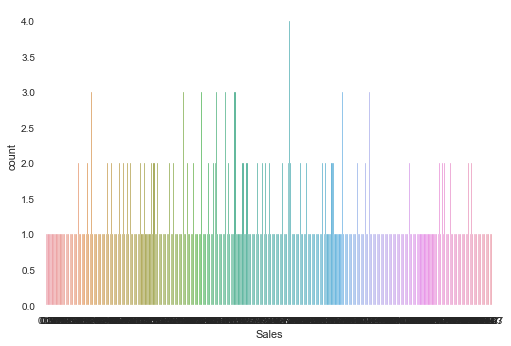

In [8]:
# Checking the distribution of the target variable
sns.countplot(x='Sales', data=company)
plt.show()

In [9]:
# Checking the correlation between the variables
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

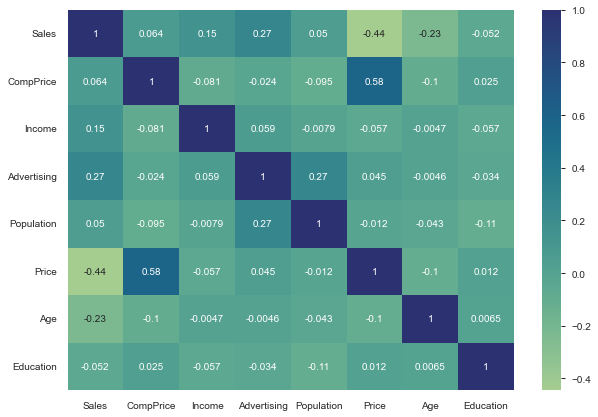

In [10]:
# HEATMAP CORRELATION
plt.figure(figsize=(10,7))
sns.heatmap(company.corr(),cmap="crest",annot=True)

### heatmap,The lighter color shows the higher cor-relation betweem two variables and the darker color has less relation ship.correlation has a positive correlation between Population and advertising and also Comp price and Price

# BOXPLOT

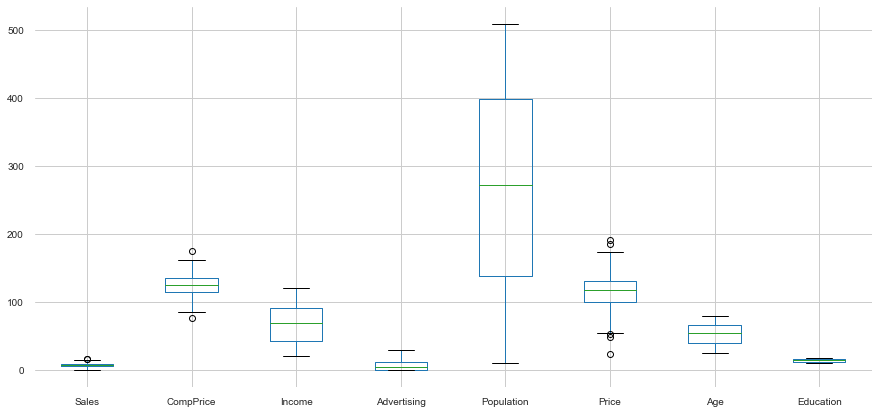

In [11]:
boxplot = company.boxplot(column=['Sales', 'CompPrice', 'Income','Advertising','Population','Price','Age','Education'],figsize=(15, 7))  
plt.show()

### Their are not much affect of this outliers to dataset.

# Analysis count plot on single categorical variable

<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

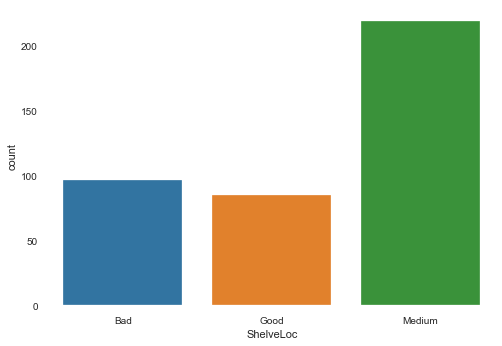

In [12]:
sns.countplot(x ='ShelveLoc', data = company)

<AxesSubplot:xlabel='Urban', ylabel='count'>

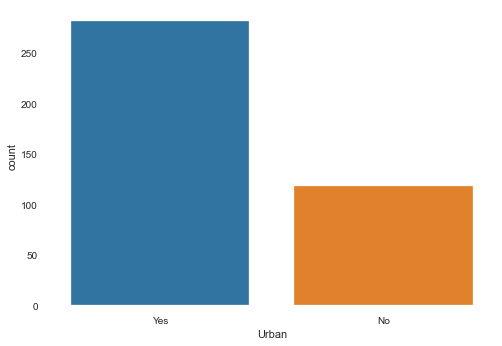

In [13]:
sns.countplot(x ='Urban', data = company)

<AxesSubplot:xlabel='US', ylabel='count'>

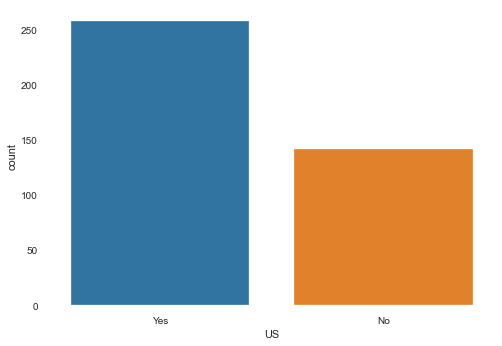

In [14]:
sns.countplot(x ='US', data = company)

### Over here Medium has higher ShelveLoc while in Urban and US, Yes has a greater weightage.good shelf location gives increase in sales.

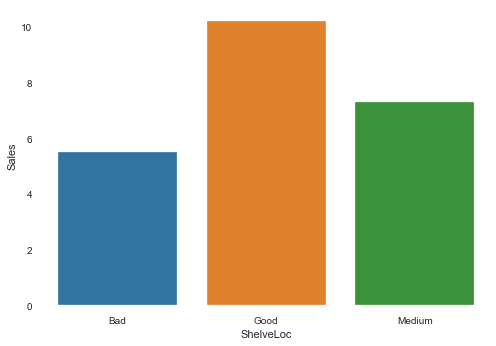

In [15]:
sns.barplot(data=company, x='ShelveLoc',y='Sales',ci=False) 
plt.show();

### Dataset has high count of mediam quality of shelf location and low count of good quality of shelf location

In [16]:
# SKEWNESS
company.skew()

C:\Users\Anup sharma\AppData\Local\Temp\ipykernel_128\1186471093.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  company.skew()


Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

Skewness measures the asymmetry of a distribution.

In [17]:
#Kurtosis 
company.kurtosis()

C:\Users\Anup sharma\AppData\Local\Temp\ipykernel_128\1841463889.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  company.kurtosis()


Sales         -0.080877
CompPrice      0.041666
Income        -1.085289
Advertising   -0.545118
Population    -1.202318
Price          0.451885
Age           -1.134392
Education     -1.298332
dtype: float64

Kurtosis measures the heaviness of a distribution's tails relative to a normal distribution.

# Duplicates

In [18]:
#count of duplicated rows and columns
company[company.duplicated()].shape

(0, 11)

# Converting target variable to categorical data

In [19]:
#def tran to assign low risky and good values
# less than equal to or numpy mean
def tran(x):
    if x<= np.mean(company.Sales):
        return 'Low'
    else: 
        return 'High'

In [20]:
#remove last element from the list pop
# pop use karne se sale ka 2 columns nhi aayega
company['sale'] = company['Sales'].copy()
company['sale'] = company['sale'].apply(tran)
company.pop('Sales')
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


# LABEL ENCODER

In [21]:
#LABEL ENCODER
label_encoder= preprocessing.LabelEncoder()
company['sale']= label_encoder.fit_transform(company['sale'])
company

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,138,73,11,276,120,Bad,42,17,Yes,Yes,0
1,111,48,16,260,83,Good,65,10,Yes,Yes,0
2,113,35,10,269,80,Medium,59,12,Yes,Yes,0
3,117,100,4,466,97,Medium,55,14,Yes,Yes,1
4,141,64,3,340,128,Bad,38,13,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,0
396,139,23,3,37,120,Medium,55,11,No,Yes,1
397,162,26,12,368,159,Medium,40,18,Yes,Yes,1
398,100,79,7,284,95,Bad,50,12,Yes,Yes,1


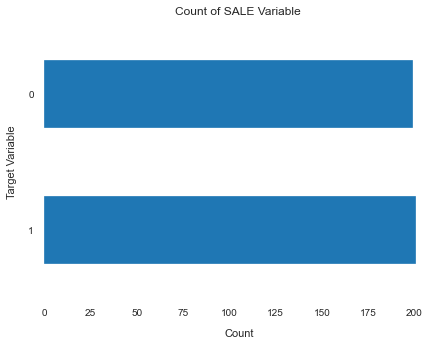

In [22]:
#labelpad : This parameter is the spacing in points from the axes bounding box including ticks and tick labels.
#The plot.barh() function is used to make a horizontal bar plot.
company['sale'].value_counts().plot(kind='barh', figsize=(7,5))
plt.xlabel("Count", labelpad=11)
plt.ylabel("Target Variable", labelpad=11)
plt.title("Count of SALE Variable ", y=1.02);

In [23]:
100*company['sale'].value_counts()/len(company['sale'])

1    50.25
0    49.75
Name: sale, dtype: float64

Data is Equal balance, ratio = 50:50.So we analyse the data with other features while taking the target values separately to get some insights.

# One-Hot Encoding of categrical variables

In [24]:
# One-Hot Encoding of categrical variables
company=pd.get_dummies(company,columns=['Urban','US','ShelveLoc'])
company

,CompPrice,Income,Advertising,Population,Price,Age,Education,sale,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,0,0,1,0,1,1,0,0
1,111,48,16,260,83,65,10,0,0,1,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,0,1
3,117,100,4,466,97,55,14,1,0,1,0,1,0,0,1
4,141,64,3,340,128,38,13,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,0,1,0,1,0,1,0
396,139,23,3,37,120,55,11,1,1,0,0,1,0,0,1
397,162,26,12,368,159,40,18,1,0,1,0,1,0,0,1
398,100,79,7,284,95,50,12,1,0,1,0,1,1,0,0


In [25]:
#correlation matrix
company.corr()

,CompPrice,Income,Advertising,Population,Price,Age,Education,sale,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035578,-0.066594,0.066594,-0.016869,0.016869,-0.035393,0.026386,0.008683
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,-0.123460,-0.037967,0.037967,-0.089601,0.089601,0.072017,-0.012657,-0.051392
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.251910,-0.042035,0.042035,-0.684460,0.684460,-0.035217,0.056149,-0.015929
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,-0.069327,0.052025,-0.052025,-0.060564,0.060564,0.039902,0.007789,-0.040640
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,0.392275,-0.047016,0.047016,-0.057861,0.057861,-0.036220,0.045854,-0.006607
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,0.186707,-0.028479,0.028479,-0.008652,0.008652,-0.044123,-0.022818,0.056613
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.028847,0.033094,-0.033094,0.078250,-0.078250,0.012525,-0.029188,0.013242
sale,-0.035578,-0.123460,-0.251910,-0.069327,0.392275,0.186707,0.028847,1.000000,-0.047090,0.047090,0.142579,-0.142579,0.278169,-0.363170,0.059796
Urban_No,-0.066594,-0.037967,-0.042035,0.052025,-0.047016,-0.028479,0.033094,-0.047090,1.000000,-1.000000,0.047085,-0.047085,-0.081122,0.039197,0.037391
Urban_Yes,0.066594,0.037967,0.042035,-0.052025,0.047016,0.028479,-0.033094,0.047090,-1.000000,1.000000,-0.047085,0.047085,0.081122,-0.039197,-0.037391


### sales and price are positivly correlated of each other.and comprice and price are positivly correlated

In [26]:
#null values and the data types
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CompPrice         400 non-null    int64
 1   Income            400 non-null    int64
 2   Advertising       400 non-null    int64
 3   Population        400 non-null    int64
 4   Price             400 non-null    int64
 5   Age               400 non-null    int64
 6   Education         400 non-null    int64
 7   sale              400 non-null    int32
 8   Urban_No          400 non-null    uint8
 9   Urban_Yes         400 non-null    uint8
 10  US_No             400 non-null    uint8
 11  US_Yes            400 non-null    uint8
 12  ShelveLoc_Bad     400 non-null    uint8
 13  ShelveLoc_Good    400 non-null    uint8
 14  ShelveLoc_Medium  400 non-null    uint8
dtypes: int32(1), int64(7), uint8(7)
memory usage: 26.3 KB


In [27]:
#finding null values
company.isnull().sum()

CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
sale                0
Urban_No            0
Urban_Yes           0
US_No               0
US_Yes              0
ShelveLoc_Bad       0
ShelveLoc_Good      0
ShelveLoc_Medium    0
dtype: int64

# Train and Test Split data

In [28]:
#Train and Test Split data
x=pd.concat([company.iloc[:,0:7],company.iloc[:,8:]],axis=1)
y=company.iloc[:,7]

In [29]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: sale, Length: 400, dtype: int32

In [30]:
#splitting data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
3,117,100,4,466,97,55,14,0,1,0,1,0,0,1
18,110,110,0,408,68,46,17,1,0,0,1,0,1,0
202,121,78,4,413,130,46,10,1,0,0,1,1,0,0
250,137,105,10,435,156,72,14,0,1,0,1,0,1,0
274,135,93,2,67,119,34,11,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,148,51,16,148,150,58,17,1,0,0,1,0,0,1
106,102,33,0,217,139,70,18,1,0,1,0,0,0,1
270,119,26,0,284,89,26,10,0,1,1,0,0,1,0
348,132,102,20,459,107,49,11,0,1,0,1,0,1,0


# Building Decision Tree Classifier using Entropy Criteria

 Decision tree classifier with maximum depth as 3 and fitting the model

In [31]:
# Decision tree classifier with maximum depth as 3 and fitting the model
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=33)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=33)

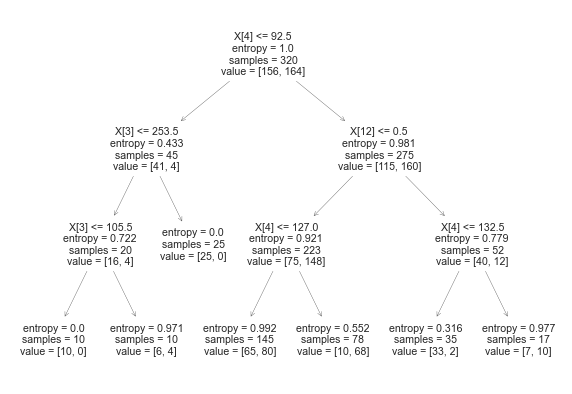

In [32]:
# plot the decision tree
plt.figure(figsize=(10,7))
tree.plot_tree(model);

In [33]:
y_train.value_counts()

1    164
0    156
Name: sale, dtype: int64

# Visualization for decision tree

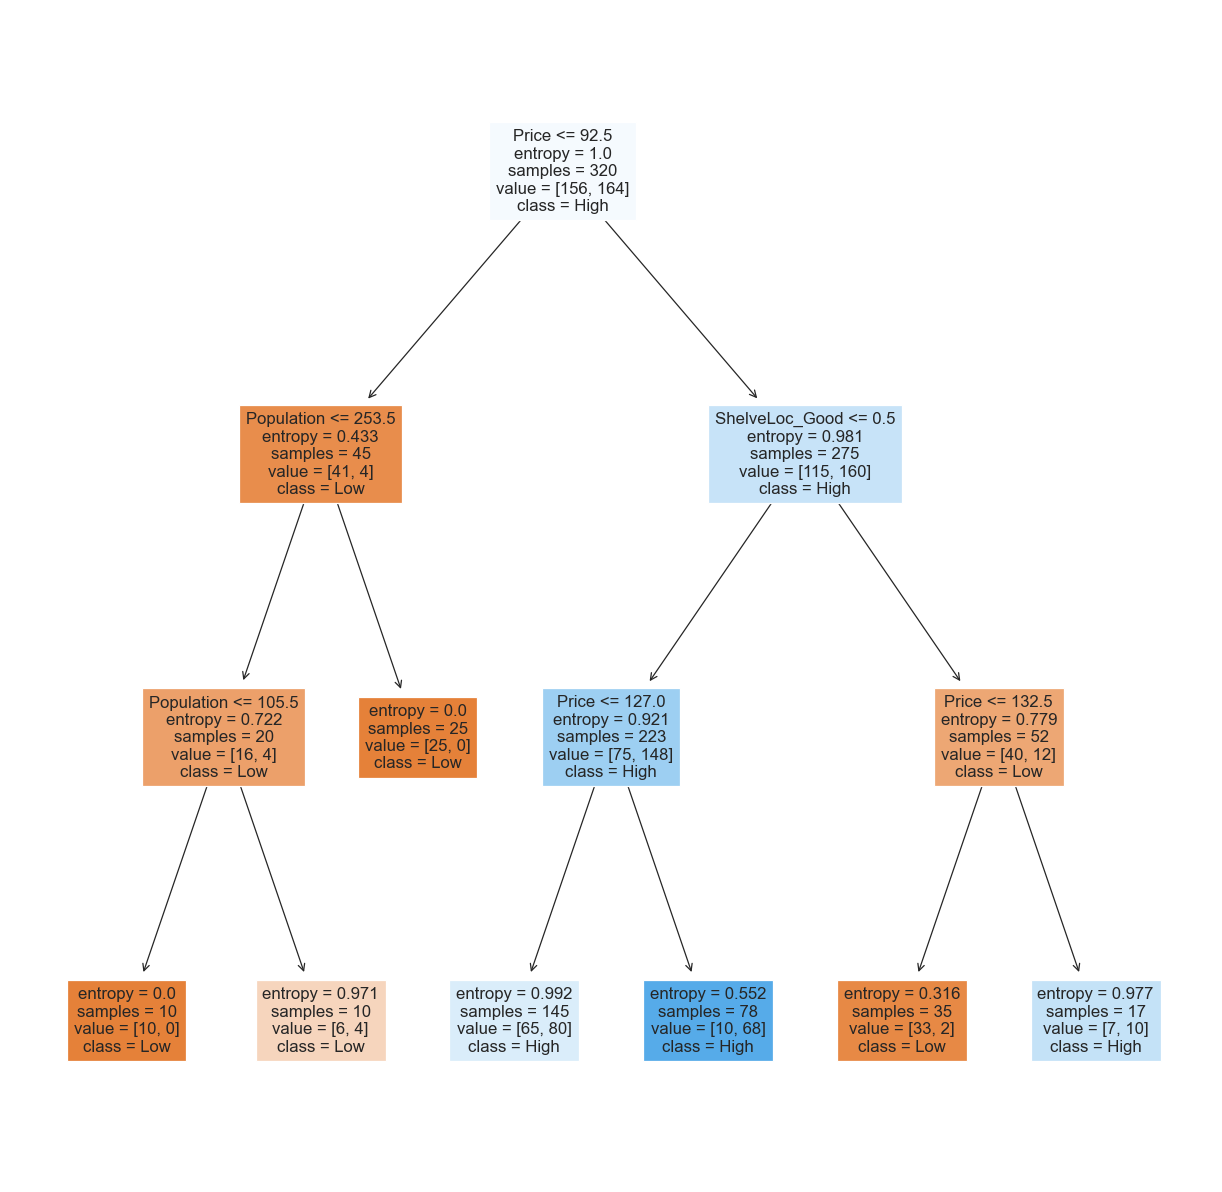

In [34]:
# Visualization for decision tree
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','Urban_No','Urban_Yes','US_No','US_Yes','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium']
cn=['Low','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [35]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    50
0    30
dtype: int64

In [36]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions
# confusion matrix

col_0,0,1
sale,,
0,26,17
1,4,33


In [37]:
# Accuracy 
np.mean(preds==y_test)

0.7375

# Building Decision Tree Classifier (CART) using Gini Criteria

In [38]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [39]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [40]:
model_gini.score(x_train, y_train)

0.746875

In [41]:
model_gini.score(x_test,y_test)

0.6125

In [42]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.6125

# HYPER PARAMETER TUNING 

# Grid Search

 Apply Grid Search on Decision Tree Classifier to hypertune parameters.

In [43]:
#Parameter grid
parameter_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "criterion": ["gini", "entropy"]}


In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
clf=DecisionTreeClassifier (random_state=33)
grid_search = GridSearchCV(clf, param_grid=parameter_grid)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=33),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]})

In [46]:
# GS_score=grid_search.score(Data_train,label_train)
# print("Training score: %.2f " % GS_score)
score_gs=grid_search.score(x_test,y_test)
print("Testing score: %.2f " % score_gs)

Testing score: 0.80 


# Randomised Search

Apply Randomized Search on Decision Tree Classifier to hypertune parameters.

In [47]:
#Parameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "criterion": ["gini", "entropy"]}


In [48]:
clf1=DecisionTreeClassifier (random_state=33)

In [49]:
# n_iter_search = 20
from sklearn.model_selection import RandomizedSearchCV
decision_search = RandomizedSearchCV(clf1, param_distributions=param_grid,
                                   n_iter=20)

In [50]:
decision_search.fit(x_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=33), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': [1, 3, 10],
                                        'min_samples_leaf': [1, 3, 10],
                                        'min_samples_split': [2, 3, 10]})

In [51]:
score_rs=decision_search.score(x_test,y_test)
print("Testing score: %.2f " % score_rs)

Testing score: 0.75 


### grid search is the better option, compared to the randomized one because with grid search there is a guarantee of finding the most optimum model.
